# Prueba de Conocimientos 

Resolución del ejercicio con los instrucciones y tips que se encuentra en el README.md

## Carga de librerías y archivos

Para la resolución de este prueba se usaron las siguientes librerías: 
- Pandas & Numpy: Para la creación de dataframes y lectura del archivo excel. 
- Seaborn & Matplotlib: Librerías enfocadas en la creación de gráficas.
- Request: para hacer llamadas a las API
- Json: Manipulación de archivos tipo Json

In [49]:
# Carga de librerías para análisis  y limpieza de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import requests 
import json
import datetime

In [50]:
#Carga de Archivos
excel = pd.ExcelFile("../Data/Prueba.xlsx")
print(excel.sheet_names)

['Instrucciones', 'Glosario', 'PuntoPartida', 'PuntoLlegada', 'Siniestros']


In [51]:
# Creando dataframes
df_punto_partida = excel.parse("PuntoPartida",header=2,usecols="C:K")
df_punto_llegada = excel.parse("PuntoLlegada", header=1,usecols="B:J")
df_siniestros = excel.parse("Siniestros")

## Limpieza de datos

En la limpieza de datos, el principal enfoque fue identificar los tipos de datos que debería tener cada dataframe y cambiarlo de ser necesario

### DF Punto de Partida

In [52]:
df_punto_partida

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1


In [53]:
df_punto_partida.dtypes

IDRuta                   object
NombreRuta               object
TipoUbicacion            object
Empresa                  object
HoraProgramadaSalida     object
Longitud                float64
Latitud                 float64
ValorMercancia            int64
IDConductor               int64
dtype: object

In [54]:
df_punto_partida['HoraProgramadaSalida'] = pd.to_datetime(df_punto_partida['HoraProgramadaSalida'],format="%H:%M:%S").dt.time

In [55]:
df_punto_partida.dtypes

IDRuta                   object
NombreRuta               object
TipoUbicacion            object
Empresa                  object
HoraProgramadaSalida     object
Longitud                float64
Latitud                 float64
ValorMercancia            int64
IDConductor               int64
dtype: object

### DF Punto de LLegada

In [56]:
df_punto_llegada

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,08:58:00,"-100.318156048963,",25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


In [57]:
df_punto_llegada.dtypes

IDRuta             object
NombreRuta         object
TipoUbicacion      object
Empresa            object
HoraSalida         object
Longitud           object
Latitud           float64
ValorMercancia      int64
IDConductor         int64
dtype: object

In [58]:
# Se imprimen los valores con todo y los caracteres invisibles.
print(repr(df_punto_llegada['Longitud']))

0           -100.228542
1    -100.318156048963,
2           -100.242414
3           -100.381548
4           -100.318156
Name: Longitud, dtype: object


In [59]:
def limpiar_valor(valor):
    """Limpia los valores en caso de ser STR o INT, eliminando espacios y comillas

    Args:
        valor (Str or Int): se evalúan los valores del DF

    Returns:
        int: valor después de la limpieza
    """
    if isinstance(valor,str):
        return valor.rstrip(',').strip()
    return valor

In [60]:
df_punto_llegada['Longitud'] = df_punto_llegada['Longitud'].apply(limpiar_valor).astype('float64')

In [61]:
df_punto_llegada

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,08:58:00,-100.318156,25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


In [62]:
df_punto_llegada['HoraSalida'] = pd.to_datetime(df_punto_llegada['HoraSalida'],format="%H:%M:%S").dt.time

In [63]:
#Comprobación de cambios realizados
df_punto_llegada.dtypes

IDRuta             object
NombreRuta         object
TipoUbicacion      object
Empresa            object
HoraSalida         object
Longitud          float64
Latitud           float64
ValorMercancia      int64
IDConductor         int64
dtype: object

### DF Siniestros

In [64]:
df_siniestros.head(10)

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud
0,10001415,Robo,Con violencia,Tienda,4.0,NaN,84723,25.808908,-100.379278
1,10001213,Robo,Con violencia,Vehiculo,NaN,2.0,117041,25.799021,-100.386182
2,10001224,Robo,Sin violencia,Vehiculo,NaN,2.0,116400,25.797738,-100.381691
3,10001327,Robo,Sin violencia,Vehiculo,NaN,3.0,117888,25.786821,-100.379681
4,10001316,Robo,Con violencia,Tienda,3.0,NaN,73533,25.777179,-100.180762
5,10001122,Robo,Sin violencia,Tienda,1.0,NaN,81956,25.772846,-100.178529
6,1000125,Robo,Con violencia,Vehiculo,NaN,2.0,68228,25.772149,-100.177221
7,10001117,Robo,Sin violencia,Tienda,1.0,NaN,107594,25.769586,-100.375682
8,10001243,Vandalismo,NaN,Vehiculo,NaN,2.0,79137,25.756691,-100.172353
9,10001126,Robo,Sin violencia,Tienda,1.0,NaN,116234,25.748384,-100.372651


In [65]:
df_siniestros.dtypes

FolioSiniestro       int64
Evento              object
Subtipo             object
UnidadOperativa     object
IDTienda           float64
IDVehiculo         float64
ValorPerdido         int64
Latitud            float64
Longitud           float64
dtype: object

In [66]:
# Se busca que todas las tiendas tengan asignado un ID Tienda. 
df_siniestros[df_siniestros['UnidadOperativa'] == 'Tienda']

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud
0,10001415,Robo,Con violencia,Tienda,4.0,NaN,84723,25.808908,-100.379278
4,10001316,Robo,Con violencia,Tienda,3.0,NaN,73533,25.777179,-100.180762
5,10001122,Robo,Sin violencia,Tienda,1.0,NaN,81956,25.772846,-100.178529
7,10001117,Robo,Sin violencia,Tienda,1.0,NaN,107594,25.769586,-100.375682
9,10001126,Robo,Sin violencia,Tienda,1.0,NaN,116234,25.748384,-100.372651
10,1000118,Robo,Sin violencia,Tienda,1.0,NaN,69180,25.741480,-100.200264
14,10001349,Vandalismo,NaN,Tienda,3.0,NaN,97066,25.728576,-100.350229
15,1000111,Robo,Con violencia,Tienda,1.0,NaN,113518,25.723328,-100.375832
16,10001111,Robo,Sin violencia,Tienda,1.0,NaN,79427,25.721607,-100.212357
17,10001242,Vandalismo,NaN,Tienda,2.0,NaN,61383,25.720094,-100.203750


In [67]:
# Mismo caso que en el anterior ahora aplicado a vehículo 
df_siniestros[df_siniestros['UnidadOperativa'] == 'Vehiculo']

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud
1,10001213,Robo,Con violencia,Vehiculo,NaN,2.0,117041,25.799021,-100.386182
2,10001224,Robo,Sin violencia,Vehiculo,NaN,2.0,116400,25.797738,-100.381691
3,10001327,Robo,Sin violencia,Vehiculo,NaN,3.0,117888,25.786821,-100.379681
6,1000125,Robo,Con violencia,Vehiculo,NaN,2.0,68228,25.772149,-100.177221
8,10001243,Vandalismo,NaN,Vehiculo,NaN,2.0,79137,25.756691,-100.172353
11,10001135,Extorsión,NaN,Vehiculo,NaN,1.0,84059,25.740682,-100.183675
12,10001445,Vandalismo,NaN,Vehiculo,NaN,4.0,130815,25.738603,-100.406430
13,10001236,Extorsión,NaN,Vehiculo,NaN,2.0,89949,25.729284,-100.357838
19,10001110,Robo,Con violencia,Vehiculo,NaN,1.0,136021,25.705438,-100.369566
32,10001339,Vandalismo,NaN,Vehiculo,NaN,3.0,18176,25.683101,-100.282867


## Calculo de Preguntas

### b) Realiza un gráfico que muestre una descripción de la tabla encontrada en la hoja de Siniestros

Uso de librería Seaborn para crear gráficas, enfocándonos en los tipos de siniestros y unidad operativa.


Text(0.5, 1.0, 'Comparativa Siniestros Tienda VS Vehiculo')

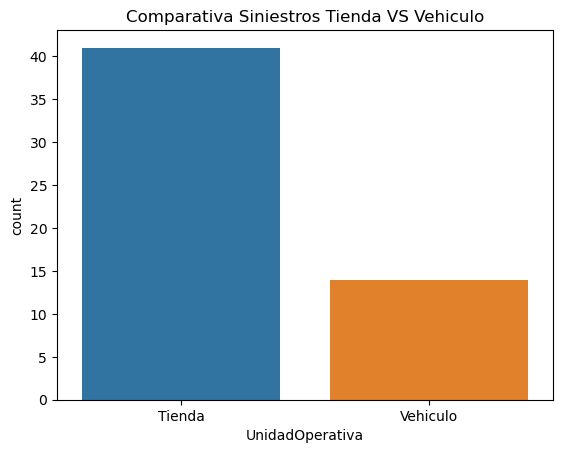

In [68]:
sns.countplot(data=df_siniestros,x='UnidadOperativa').set_title("Comparativa Siniestros Tienda VS Vehiculo")

Text(0.5, 1.0, 'Cantidad de Tipos de Siniestros y Unidad Operativa')

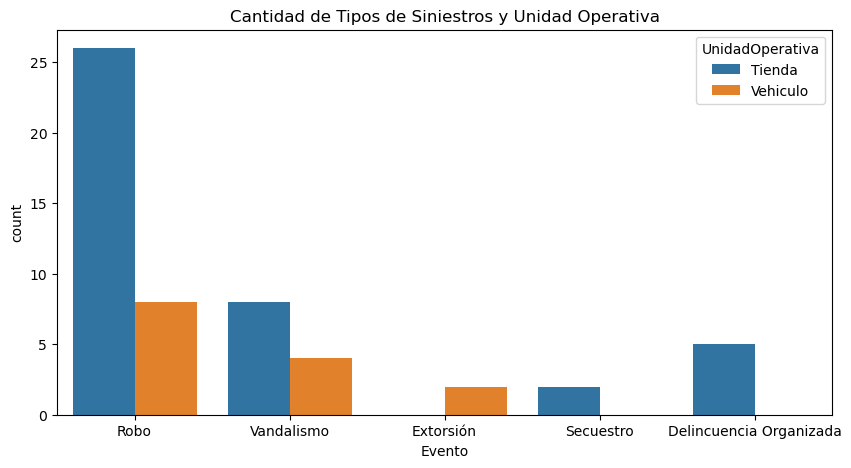

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_siniestros,x='Evento', hue='UnidadOperativa').set_title("Cantidad de Tipos de Siniestros y Unidad Operativa")


/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

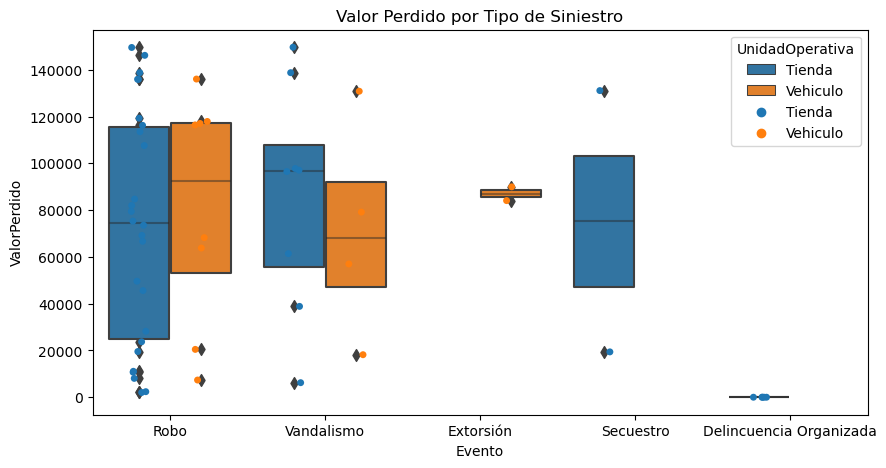

In [70]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df_siniestros,x='Evento',y='ValorPerdido', hue='UnidadOperativa',dodge=True)
sns.stripplot(data=df_siniestros,x='Evento',y='ValorPerdido', hue='UnidadOperativa',dodge=True).set_title("Valor Perdido por Tipo de Siniestro")
plt.show()

/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

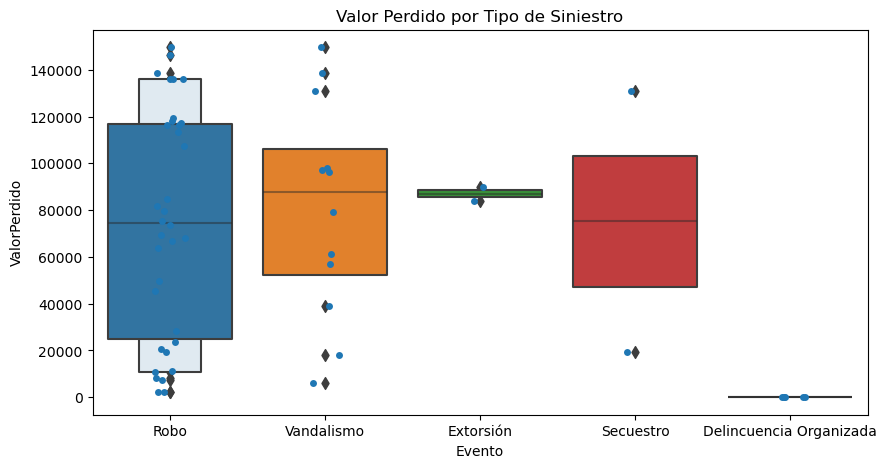

In [71]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df_siniestros,x='Evento',y='ValorPerdido')
sns.stripplot(data=df_siniestros,x='Evento',y='ValorPerdido').set_title("Valor Perdido por Tipo de Siniestro")
plt.show()

/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aipa/anaconda3/envs/ox/lib/python3.12/site-packages/seabo

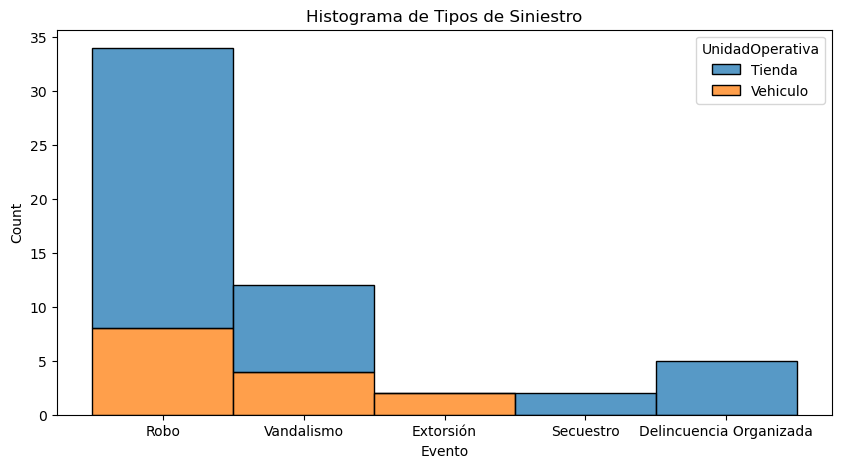

In [72]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_siniestros,x='Evento',hue='UnidadOperativa',multiple='stack').set_title("Histograma de Tipos de Siniestro")
plt.show()

### a) Calcula la driving distance (distancia en automóvil) y un estimado del tiempo de llegada de cada ruta

In [73]:
df_punto_partida

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1


In [74]:
df_punto_llegada

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,08:58:00,-100.318156,25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


In [75]:
df_rutas = df_punto_partida.copy()

In [76]:
df_rutas = df_rutas.merge(df_punto_llegada[['IDRuta','Longitud','Latitud']],left_on='IDRuta',right_on='IDRuta',how='inner')

In [77]:
df_rutas = df_rutas.rename(columns={
                        'Longitud_x':'Longitud_Inicio',
                        'Latitud_x':'Latitud_Inicio',
                        'Longitud_y':'Longitud_Final',
                        'Latitud_y':'Latitud_Final',
                        })

In [78]:
df_rutas

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud_Inicio,Latitud_Inicio,ValorMercancia,IDConductor,Longitud_Final,Latitud_Final
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1,-100.228542,25.550476
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1,-100.318156,25.685163
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1,-100.242414,25.664271
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1,-100.381548,25.664200
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1,-100.318156,25.685163


Para la consulta a la API se esta usando (http://project-osrm.org/docs/v5.5.1/api/#route-service) y para hacer la llamada a la API es de la siguiente manera : 

/route/v1/{profile}/{coordinates}?alternatives={true|false}&steps={true|false}&geometries={polyline|polyline6|geojson}&overview={full|simplified|false}&annotations={true|false}

y los parámetros admitidos son los siguientes 

- profile - car, bike, foot
- coordinates - lat,lon el primero a enviar es; lon, lat y después el segundo punto, e.g. 2.333333,48.866667;12.483333,41.900000
- alternative - regresar la primera ruta, o se permiten mas alternativas
- steps - regresa la cantidad de pasos
- geometries - como regresa la información geoespacial, either polyline (default), polyline6, geojson`
- overview - como regresar la información - simplified (default), full, false

In [79]:
def Consulta_API(Longitud_Inicio,Latitud_Inicio,Longitud_Final,Latitud_Final,Consulta=None):
    """
    Genera una petición a la API de OSRM para el calculo del driving distance, 
    regresando un JSON para con la información de Tiempo y distancia 
    en caso de que no regrese la función retorna un NAN
    
    Args:
        Longitud_Inicio (float):
        Latitud_Inicio (float):
        Longitud_Final (float):
        Latitud_Final (float):
        Consulta (Str):

    Returns:
        "T" -> (str): El tiempo estimado de la ruta
        "D" -> (float): La distancia en metros de la ruta optima
        None -> (array): Regresa los dos tipos de datos mencionados
    """
    try: 
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{Longitud_Inicio},{Latitud_Inicio};{Longitud_Final},{Latitud_Final}?overview=false""")
        r = json.loads(r.content)["routes"][0]
        if Consulta =="T":
            r = datetime.timedelta(seconds=r['duration'])
            return str(r)
        elif Consulta =='D':
            return r['distance']
        else:
            return r
    except: 
        return 
    

In [80]:
df_rutas["Distancia(M)"] = df_rutas.apply(lambda row: Consulta_API(row['Longitud_Inicio'],row['Latitud_Inicio'],row['Longitud_Final'],row['Latitud_Final'],"D"),axis=1)
df_rutas["Tiempo_Estimado"] = df_rutas.apply(lambda row: Consulta_API(row['Longitud_Inicio'],row['Latitud_Inicio'],row['Longitud_Final'],row['Latitud_Final'],"T"),axis=1)

In [81]:
df_rutas

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud_Inicio,Latitud_Inicio,ValorMercancia,IDConductor,Longitud_Final,Latitud_Final,Distancia(M),Tiempo_Estimado
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1,-100.228542,25.550476,20482.1,0:17:34.300000
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1,-100.318156,25.685163,13728.1,0:17:32.400000
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1,-100.242414,25.664271,23049.7,0:26:10.300000
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1,-100.381548,25.664200,25139.5,0:26:37.200000
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1,-100.318156,25.685163,14105.0,0:15:28.200000


### c) Con la información de Siniestros y las Rutas calculadas, evalúa el nivel de riesgo de cada ruta (también pueden ser variables cualitativas si se argumenta en la presentación

En este caso se toma como referencia el punto de inicio y el punto final y la mitad de la distancia promedio de todas las driving distance
con el objetivo de identificar a partir de la proximidad entre la ubicación inicial y la ubicación final y los siniestros provocados que tanta cercanía hay entre estas ubicaciones.

Lo cual da como un resultado una matriz y partir de hay se toman para el calculo de riesgos los siniestros que se encuentren cercas de ubicación y sean menores a la mitad de la distancia promedio.

In [82]:
df_rutas['Distancia(M)'].mean()/2

9650.439999999999

In [83]:
df_siniestros2=df_siniestros.copy

In [84]:
df_ruta= df_rutas[['IDRuta','Longitud_Inicio','Latitud_Inicio','Longitud_Final','Latitud_Final']]

In [85]:

for i, ruta in df_rutas.iterrows():
    columna_inicio= f"""Distancia_Inicio_{ruta['IDRuta']}"""
    columna_final=f"""Distancia_Final_{ruta['IDRuta']}"""
    
    distancias_inicio = []
    distancias_final = []
    
    for j, siniestro in df_siniestros.iterrows():
        distancia_inicio = Consulta_API(siniestro['Longitud'], siniestro['Latitud'], ruta['Longitud_Inicio'], ruta['Latitud_Inicio'],"D")
        distancia_final = Consulta_API(siniestro['Longitud'], siniestro['Latitud'], ruta['Longitud_Final'], ruta['Latitud_Final'],"D")
        distancias_inicio.append(distancia_inicio)
        distancias_final.append(distancia_final)
    df_siniestros[columna_inicio] = distancias_inicio
    df_siniestros[columna_final] = distancias_final



In [86]:
df_siniestros

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud,Distancia_Inicio_a1,Distancia_Final_a1,Distancia_Inicio_b2,Distancia_Final_b2,Distancia_Inicio_c3,Distancia_Final_c3,Distancia_Inicio_d4,Distancia_Final_d4,Distancia_Inicio_e5,Distancia_Final_e5
0,10001415,Robo,Con violencia,Tienda,4.0,NaN,84723,25.808908,-100.379278,18783.9,37878.3,32036.7,19691.6,30714.0,29008.8,5522.8,22723.3,11041.5,19691.6
1,10001213,Robo,Con violencia,Vehiculo,NaN,2.0,117041,25.799021,-100.386182,15721.9,36778.4,30719.5,16547.5,32934.4,28028.0,7679.4,20959.0,9277.2,16547.5
2,10001224,Robo,Sin violencia,Vehiculo,NaN,2.0,116400,25.797738,-100.381691,15766.3,36186.9,28938.2,15956.1,32696.5,25910.3,7441.5,20367.5,9506.8,15956.1
3,10001327,Robo,Sin violencia,Vehiculo,NaN,3.0,117888,25.786821,-100.379681,14228.0,34551.0,27399.9,14320.1,34134.4,24372.0,8879.5,18731.6,8089.6,14320.1
4,10001316,Robo,Con violencia,Tienda,3.0,NaN,73533,25.777179,-100.180762,21771.7,35416.5,17790.7,20896.8,3788.7,17262.7,23211.8,30022.7,34912.1,20896.8
5,10001122,Robo,Sin violencia,Tienda,1.0,NaN,81956,25.772846,-100.178529,22541.2,36185.9,18560.1,21666.3,4558.2,18032.1,23981.2,30792.1,35681.5,21666.3
6,1000125,Robo,Con violencia,Vehiculo,NaN,2.0,68228,25.772149,-100.177221,22730.7,36375.5,18749.7,21855.8,4747.7,18221.7,24170.8,30981.7,35871.1,21855.8
7,10001117,Robo,Sin violencia,Tienda,1.0,NaN,107594,25.769586,-100.375682,12605.0,33023.2,25776.9,12792.3,36794.8,24272.8,11719.7,17203.8,8343.2,12792.3
8,10001243,Vandalismo,NaN,Vehiculo,NaN,2.0,79137,25.756691,-100.172353,20353.9,33998.6,14267.0,19478.9,7825.7,15844.8,25482.9,28604.8,33494.2,19478.9
9,10001126,Robo,Sin violencia,Tienda,1.0,NaN,116234,25.748384,-100.372651,9802.0,30858.5,24799.6,10627.6,30164.0,22108.1,14978.2,15039.1,8736.1,10627.6


In [87]:
#df_siniestros.to_csv("../Data/Siniestros_Matrix.csv")